In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import file
df = pd.read_csv('all_df.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#Drop columns that we don't want to use in prediction
df = df.drop(df.index[358]).reset_index(drop=True)
df = df.drop(['Unnamed: 0', 'Date', 'Revenue', 'Users', 'Sessions', 'Transactions', 'Quantity', 'Bounces', 'Pages / Session',
              'Session Duration', 'Avg. Session Duration Seconds', "('Users', '(Other)')", "('Users', 'Affiliate')","('Users', 'CSE')",
             "('Users', 'Direct')", "('Users', 'Display')", "('Users', 'Email')","('Users', 'Organic Search')", 
             "('Users', 'Organic Social')", "('Users', 'Paid Search')", "('Users', 'Paid Social')", "('Users', 'Partnerships')",
             "('Users', 'Referral')","('Users', 'Social')", "('Revenue', '(Other)')", "('Revenue', 'Affiliate')",
             "('Revenue', 'CSE')", "('Revenue', 'Direct')", "('Revenue', 'Display')", "('Revenue', 'Email')",
             "('Revenue', 'Organic Search')", "('Revenue', 'Organic Social')", "('Revenue', 'Paid Search')",
             "('Revenue', 'Paid Social')", "('Revenue', 'Partnerships')", "('Revenue', 'Referral')","('Revenue', 'Social')",
             "('Transactions', '(Other)')", "('Transactions', 'Affiliate')","('Transactions', 'CSE')", "('Transactions', 'Direct')",
             "('Transactions', 'Display')", "('Transactions', 'Email')","('Transactions', 'Organic Search')",
             "('Transactions', 'Organic Social')", "('Transactions', 'Paid Search')", "('Transactions', 'Paid Social')", 
             "('Transactions', 'Partnerships')", "('Transactions', 'Referral')","('Transactions', 'Social')","('Users', 'desktop')", 
             "('Users', 'mobile')","('Users', 'tablet')", "('Revenue', 'desktop')", "('Revenue', 'mobile')","('Revenue', 'tablet')",
              "('Transactions', 'desktop')", "('Transactions', 'mobile')","('Transactions', 'tablet')", "('Spend', 'Affiliate')",
              "('Spend', 'CSE')","('Spend', 'Display')", "('Spend', 'PLA')", "('Spend', 'Paid Search')", "('Spend', 'Paid Social')",
              "Orders Plan", "Units Plan", "Daily Margin $ Plan", "Daily Net Shipped Revenue Plan", 'Daily Traffic Plan', 'CVR Plan', 
              'AOV Plan', 'EA'], axis=1)

#
df = df.replace([np.inf], np.nan)
df = df.fillna(0)
df.head()

,Revenue Yesterday,Revenue Two Days Ago,Users Yesterday,Sessions Yesterday,Transactions Yesterday,Quantity Yesterday,Bounces Yesterday,Pages / Sess Yesterday,Avg. Sess Dur Sec Yesterday,Revenue LY,...,SOS,SWP,Sale Day,"('Spend Yesterday', '')","('Spend LY', '')",Rev Goal Reached,Rev Goal Reached Yesterday,Users Goal Reached Yesterday,AOV Goal Reached Yesterday,CVR Goal Reached Yesterday
0,628780.30,525294.24,224137.0,278830.0,4119.0,4726.0,91546.0,4.22,201.0,573167.56,...,0,0,1,110780.03,0.0,0,0.0,0.0,0.0,0.0
1,1221370.25,628780.30,306549.0,379353.0,7667.0,10094.0,119198.0,4.36,210.0,785958.62,...,0,0,0,115872.08,0.0,0,0.0,0.0,1.0,0.0
2,704274.10,1221370.25,233431.0,281685.0,5025.0,7252.0,95546.0,4.24,206.0,847696.81,...,0,0,0,80428.53,0.0,0,0.0,0.0,1.0,0.0
3,619297.48,704274.10,282736.0,345140.0,4597.0,6169.0,139158.0,3.72,179.0,522765.52,...,1,0,1,90747.45,0.0,0,0.0,0.0,0.0,1.0
4,636135.35,619297.48,259674.0,321574.0,5004.0,6776.0,121949.0,4.01,195.0,854602.90,...,0,0,1,129980.97,0.0,0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Create the column to be predicted - original x & y, but didn't work on the MultinomialNB due to the negative spend values.
#y = df['Rev Goal Reached'].values
#X = df.drop('Rev Goal Reached', axis = 1).values

#Create a new dataset with 0 in for spend when spend was < 0
for k, v in df.iteritems():
    v[v < 0] = 0
    

print (df.head())

#Create the column to be predicted
y = df['Rev Goal Reached'].values
X = df.drop('Rev Goal Reached', axis = 1).values

#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify=y)

#Split the data into training and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify=y)

C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


   Revenue Yesterday  Revenue Two Days Ago  Users Yesterday  \
0          628780.30             525294.24         224137.0   
1         1221370.25             628780.30         306549.0   
2          704274.10            1221370.25         233431.0   
3          619297.48             704274.10         282736.0   
4          636135.35             619297.48         259674.0   

   Sessions Yesterday  Transactions Yesterday  Quantity Yesterday  \
0            278830.0                  4119.0              4726.0   
1            379353.0                  7667.0             10094.0   
2            281685.0                  5025.0              7252.0   
3            345140.0                  4597.0              6169.0   
4            321574.0                  5004.0              6776.0   

   Bounces Yesterday  Pages / Sess Yesterday  Avg. Sess Dur Sec Yesterday  \
0            91546.0                    4.22                        201.0   
1           119198.0                    4.36        

In [4]:
#knn method
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

print("Accuracy Score:", knn.score(X_test, y_test))

Test set predictions:
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0]
Accuracy Score: 0.73417721519


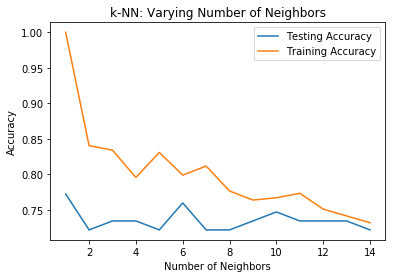

In [5]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [6]:
#knn method with number of neighbors = 6
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

y_pred1 = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred1))

print("Accuracy Score Train:", knn.score(X_train, y_train))
print("Accuracy Score Test:", knn.score(X_test, y_test))

Test set predictions:
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0]
Accuracy Score Train: 0.798722044728
Accuracy Score Test: 0.759493670886


In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Confusion Matrix
print(confusion_matrix(y_test, y_pred1))

#Classification Report
print(classification_report(y_test, y_pred1))

[[50  4]
 [15 10]]
             precision    recall  f1-score   support

          0       0.77      0.93      0.84        54
          1       0.71      0.40      0.51        25

avg / total       0.75      0.76      0.74        79



In [8]:
#clf
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
#MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
acc_train = clf.score(X_train, y_train)
acc_test = clf.score(X_test, y_test)

print('Accuracy Score Training Set:', acc_train)
print('Accuracy Score Test Set:', acc_test)


Accuracy Score Training Set: 0.670926517572
Accuracy Score Test Set: 0.708860759494


In [9]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

[[50  4]
 [16  9]]
             precision    recall  f1-score   support

          0       0.76      0.93      0.83        54
          1       0.69      0.36      0.47        25

avg / total       0.74      0.75      0.72        79



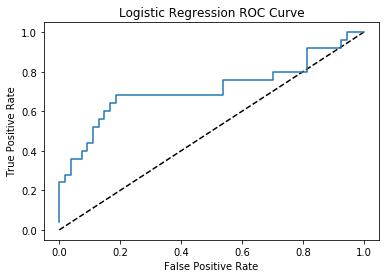

In [10]:
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show();

In [11]:
#Compute AUC score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred_prob)

print ("ROC AUC:", roc_auc)

ROC AUC: 0.711851851852


In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg, X, y, cv=5, scoring ='roc_auc')

print ("AUC scores computed using 5-fold cross-validation: {}".format(cv_scores))

AUC scores computed using 5-fold cross-validation: [ 0.6562963   0.68814815  0.77886792  0.62490566  0.62037736]


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1, 50)}

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)

print ("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_))
print ("Best score is {}".format(knn_cv.best_score_))

Tuned Logistic Regression Parameters: {'n_neighbors': 6}
Best score is 0.7397959183673469


In [14]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 2}
Best score is 0.7117346938775511


LR: 0.706346 (0.145019)
KNN: 0.724295 (0.133955)
DTC: 0.630385 (0.091788)
NB: 0.676154 (0.161779)
SVM: 0.680705 (0.161648)


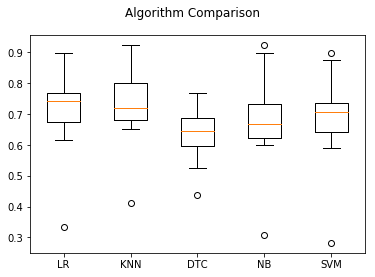

In [15]:
#Compare each of the algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [16]:
df.corr()

,Revenue Yesterday,Revenue Two Days Ago,Users Yesterday,Sessions Yesterday,Transactions Yesterday,Quantity Yesterday,Bounces Yesterday,Pages / Sess Yesterday,Avg. Sess Dur Sec Yesterday,Revenue LY,...,SOS,SWP,Sale Day,"('Spend Yesterday', '')","('Spend LY', '')",Rev Goal Reached,Rev Goal Reached Yesterday,Users Goal Reached Yesterday,AOV Goal Reached Yesterday,CVR Goal Reached Yesterday
Revenue Yesterday,1.000000,0.640084,0.879706,0.891008,0.991867,0.987816,0.814339,0.689302,0.636415,0.422084,...,0.199873,0.068198,0.168918,0.665096,0.382240,0.207170,0.267767,0.142557,-0.081938,0.135531
Revenue Two Days Ago,0.640084,1.000000,0.575635,0.581869,0.649282,0.645212,0.563745,0.520452,0.432560,0.275198,...,0.154846,0.030250,0.134036,0.558946,0.386958,0.061809,0.212877,0.109726,-0.103275,0.079234
Users Yesterday,0.879706,0.575635,1.000000,0.998829,0.890299,0.872052,0.980313,0.488605,0.459263,0.372942,...,0.262683,0.012542,0.214157,0.649643,0.332305,0.168855,0.215111,0.215491,-0.137028,0.007313
Sessions Yesterday,0.891008,0.581869,0.998829,1.000000,0.902302,0.885900,0.976255,0.512075,0.484475,0.377963,...,0.272494,0.012024,0.219388,0.652908,0.334417,0.171125,0.217689,0.209991,-0.134575,0.015019
Transactions Yesterday,0.991867,0.649282,0.890299,0.902302,1.000000,0.992977,0.829135,0.679392,0.632225,0.426061,...,0.221269,0.041687,0.173675,0.671400,0.380168,0.194649,0.249703,0.132721,-0.105377,0.138920
Quantity Yesterday,0.987816,0.645212,0.872052,0.885900,0.992977,1.000000,0.811889,0.716087,0.677935,0.412778,...,0.233261,0.050245,0.182135,0.645877,0.377577,0.213006,0.266592,0.149874,-0.095628,0.139305
Bounces Yesterday,0.814339,0.563745,0.980313,0.976255,0.829135,0.811889,1.000000,0.387470,0.372066,0.352801,...,0.255823,0.013075,0.202694,0.622182,0.346822,0.166111,0.203134,0.226172,-0.140604,-0.012599
Pages / Sess Yesterday,0.689302,0.520452,0.488605,0.512075,0.679392,0.716087,0.387470,1.000000,0.931008,0.326901,...,0.351053,0.129309,0.232717,0.383644,0.202451,0.174361,0.208746,0.013771,-0.096622,0.194819
Avg. Sess Dur Sec Yesterday,0.636415,0.432560,0.459263,0.484475,0.632225,0.677935,0.372066,0.931008,1.000000,0.285658,...,0.467541,0.101583,0.307471,0.339921,0.146121,0.146656,0.184840,-0.008477,-0.070594,0.211297
Revenue LY,0.422084,0.275198,0.372942,0.377963,0.426061,0.412778,0.352801,0.326901,0.285658,1.000000,...,0.140231,0.216687,0.093125,0.328017,0.468855,-0.040779,-0.047041,0.066207,-0.027270,-0.081806


In [17]:
df.cov()

,Revenue Yesterday,Revenue Two Days Ago,Users Yesterday,Sessions Yesterday,Transactions Yesterday,Quantity Yesterday,Bounces Yesterday,Pages / Sess Yesterday,Avg. Sess Dur Sec Yesterday,Revenue LY,...,SOS,SWP,Sale Day,"('Spend Yesterday', '')","('Spend LY', '')",Rev Goal Reached,Rev Goal Reached Yesterday,Users Goal Reached Yesterday,AOV Goal Reached Yesterday,CVR Goal Reached Yesterday
Revenue Yesterday,1.636759e+11,1.060938e+11,2.754294e+10,3.602802e+10,1.331302e+09,2.050577e+09,1.161868e+10,125352.057181,8.574109e+06,6.240272e+10,...,35962.685940,4759.026903,34202.053952,1.063645e+10,6.213619e+09,39110.997993,50550.923517,27879.264186,-16553.509865,27127.373958
Revenue Two Days Ago,1.060938e+11,1.678498e+11,1.825104e+10,2.382604e+10,8.825206e+08,1.356346e+09,8.145197e+09,95845.302172,5.901507e+06,4.120203e+10,...,28214.049082,2137.650206,27482.983053,9.052128e+09,6.370015e+09,11816.543615,40697.484766,21730.562373,-21128.479818,16060.032158
Users Yesterday,2.754294e+10,1.825104e+10,5.989084e+09,7.725694e+09,2.285845e+08,3.462819e+08,2.675491e+09,16996.836087,1.183580e+06,1.054710e+10,...,9040.998904,167.421630,8294.603215,1.987353e+09,1.033316e+09,6097.799050,7768.218487,8061.390939,-5295.442455,280.007307
Sessions Yesterday,3.602802e+10,2.382604e+10,7.725694e+09,9.989238e+09,2.991912e+08,4.543164e+08,3.441029e+09,23005.383043,1.612479e+06,1.380474e+10,...,12112.320463,207.275771,10973.951009,2.579519e+09,1.342984e+09,7981.024577,10152.704884,10145.391272,-6716.538272,742.671186
Transactions Yesterday,1.331302e+09,8.825206e+08,2.285845e+08,2.991912e+08,1.100682e+07,1.690353e+07,9.700968e+07,1013.166803,6.984877e+04,5.165531e+08,...,326.479292,23.855447,288.371568,8.805062e+07,5.067839e+07,301.344192,386.574371,212.848368,-174.577731,228.019951
Quantity Yesterday,2.050577e+09,1.356346e+09,3.462819e+08,4.543164e+08,1.690353e+07,2.632781e+07,1.469140e+08,1651.591125,1.158382e+05,7.739913e+08,...,532.297667,44.468239,467.718331,1.310019e+08,7.784474e+07,510.009421,638.313769,371.736964,-245.021556,353.631192
Bounces Yesterday,1.161868e+10,8.145197e+09,2.675491e+09,3.441029e+09,9.700968e+07,1.469140e+08,1.243706e+09,6142.233581,4.369536e+05,4.546747e+09,...,4012.382236,79.536589,3577.535812,8.673542e+08,4.914524e+08,2733.601186,3342.877401,3855.660036,-2476.120479,-219.819732
Pages / Sess Yesterday,1.253521e+05,9.584530e+04,1.699684e+04,2.300538e+04,1.013167e+03,1.651591e+03,6.142234e+03,0.202050,1.393604e+01,5.369804e+04,...,0.070179,0.010026,0.052353,6.816762e+03,3.656492e+03,0.036573,0.043785,0.002992,-0.021688,0.043325
Avg. Sess Dur Sec Yesterday,8.574109e+06,5.901507e+06,1.183580e+06,1.612479e+06,6.984877e+04,1.158382e+05,4.369536e+05,13.936036,1.108951e+03,3.476285e+06,...,6.924370,0.583486,5.124406,4.474603e+05,1.955177e+05,2.278955,2.872305,-0.136463,-1.173913,3.481184
Revenue LY,6.240272e+10,4.120203e+10,1.054710e+10,1.380474e+10,5.165531e+08,7.739913e+08,4.546747e+09,53698.040901,3.476285e+06,1.335439e+11,...,22790.936469,13658.252338,17031.816914,4.738371e+09,6.884408e+09,-6953.859887,-8021.791422,11695.414163,-4976.351564,-14790.167315


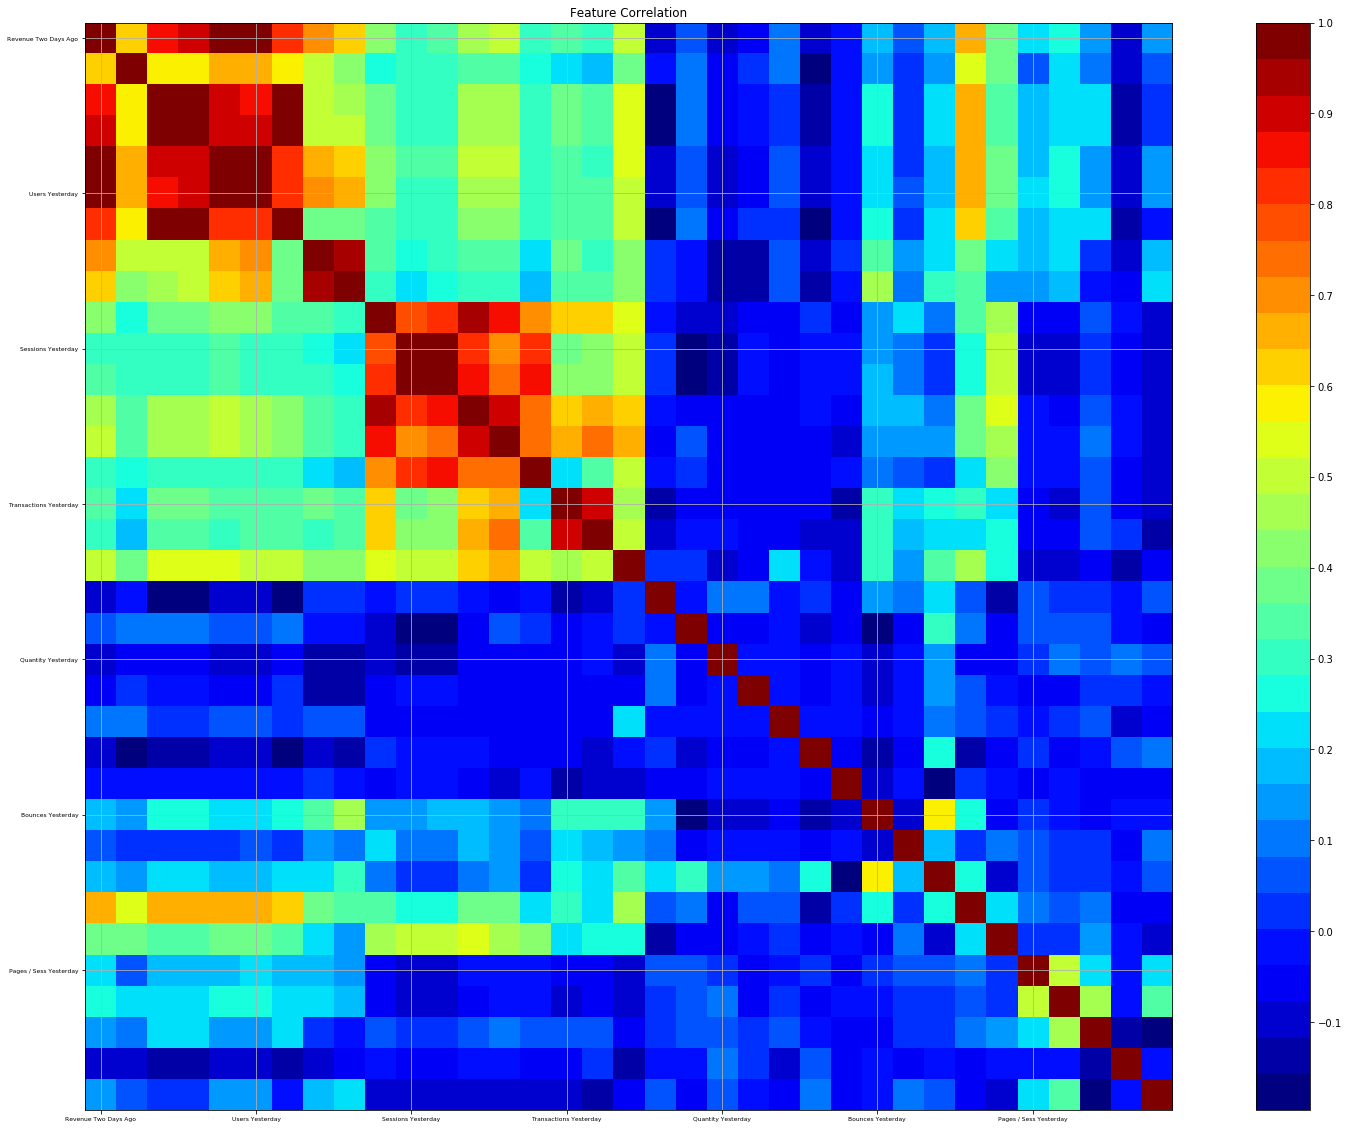

In [18]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(30,20))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels= df.columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-.5,-.4, -.3, -.2, -.1, 0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
    plt.show()

correlation_matrix(df)

In [19]:
corr = df.corr()

indices = np.where(corr > .65)
indices = [(df.columns[x], df.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
print(indices)

[('Revenue Yesterday', 'Users Yesterday'), ('Revenue Yesterday', 'Sessions Yesterday'), ('Revenue Yesterday', 'Transactions Yesterday'), ('Revenue Yesterday', 'Quantity Yesterday'), ('Revenue Yesterday', 'Bounces Yesterday'), ('Revenue Yesterday', 'Pages / Sess Yesterday'), ('Revenue Yesterday', "('Spend Yesterday', '')"), ('Users Yesterday', 'Sessions Yesterday'), ('Users Yesterday', 'Transactions Yesterday'), ('Users Yesterday', 'Quantity Yesterday'), ('Users Yesterday', 'Bounces Yesterday'), ('Sessions Yesterday', 'Transactions Yesterday'), ('Sessions Yesterday', 'Quantity Yesterday'), ('Sessions Yesterday', 'Bounces Yesterday'), ('Sessions Yesterday', "('Spend Yesterday', '')"), ('Transactions Yesterday', 'Quantity Yesterday'), ('Transactions Yesterday', 'Bounces Yesterday'), ('Transactions Yesterday', 'Pages / Sess Yesterday'), ('Transactions Yesterday', "('Spend Yesterday', '')"), ('Quantity Yesterday', 'Bounces Yesterday'), ('Quantity Yesterday', 'Pages / Sess Yesterday'), ('Qua